In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Umbrella_LasPlagas.csv', sep = ';')
df

,ID_SIMPERS,FLAG_MUT,AGE,DOSE,HEIGHT,WEIGHT,GENDER,IS_CAUCAS,HAS_APPENDIX,HAS_ALLERGY
0,10002748,1.0,17.0,19.0,164.0,120.0,M,NO,NO,NO
1,10003438,0.0,62.0,17.0,169.0,137.0,M,YES,YES,NO
2,10004371,1.0,5.0,24.0,100.0,21.0,M,YES,NO,NO
3,10002836,1.0,13.0,29.0,154.0,48.0,F,NO,NO,NO
4,10000347,0.0,35.0,28.0,198.0,121.0,M,YES,YES,YES
...,...,...,...,...,...,...,...,...,...,...
4882,10004629,0.0,52.0,39.0,165.0,90.0,M,YES,YES,NO
4883,10002019,0.0,20.0,24.0,166.0,115.0,M,NO,YES,NO
4884,10001901,0.0,44.0,20.0,205.0,121.0,F,NO,NO,NO
4885,10000011,0.0,28.0,5.0,171.0,87.0,F,YES,YES,YES


In [3]:
df = df.dropna()
print(len(df))
df.isnull().sum()

4772


ID_SIMPERS      0
FLAG_MUT        0
AGE             0
DOSE            0
HEIGHT          0
WEIGHT          0
GENDER          0
IS_CAUCAS       0
HAS_APPENDIX    0
HAS_ALLERGY     0
dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

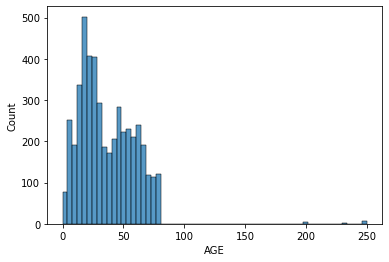

In [4]:
sns.histplot(df['AGE'])

In [5]:
df = df[df['AGE']<100]

<AxesSubplot:xlabel='DOSE', ylabel='Count'>

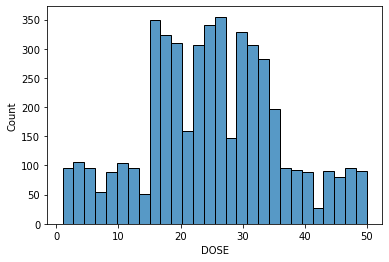

In [7]:
sns.histplot(df['DOSE'])

<AxesSubplot:xlabel='HEIGHT', ylabel='Count'>

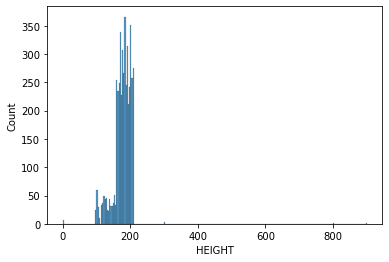

In [8]:
sns.histplot(df['HEIGHT'])

In [9]:
np.quantile(df['HEIGHT'], [0.01, 0.02, 0.95, 0.99, 0.995, 0.996, 0.997] )

array([101., 104., 207., 210., 210., 210., 210.])

In [10]:
df = df[(df['HEIGHT']<250) & (df['HEIGHT']>50)]

<AxesSubplot:xlabel='WEIGHT', ylabel='Count'>

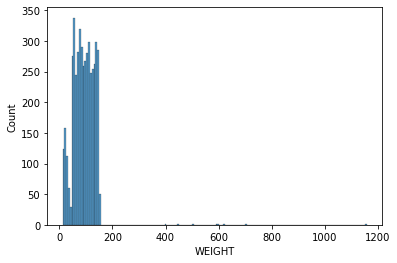

In [11]:
sns.histplot(df['WEIGHT'])

In [12]:
df = df[df['WEIGHT']<200]

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


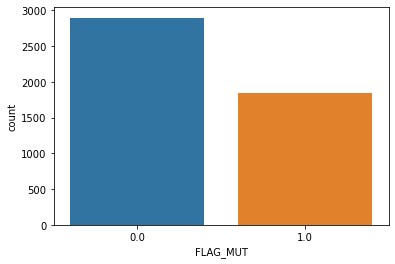

In [14]:
sns.countplot(df['FLAG_MUT']);

In [15]:
df['HEALTH'] = 1- df['FLAG_MUT']
df.head()

,ID_SIMPERS,FLAG_MUT,AGE,DOSE,HEIGHT,WEIGHT,GENDER,IS_CAUCAS,HAS_APPENDIX,HAS_ALLERGY,HEALTH
0,10002748,1.0,17.0,19.0,164.0,120.0,M,NO,NO,NO,0.0
1,10003438,0.0,62.0,17.0,169.0,137.0,M,YES,YES,NO,1.0
2,10004371,1.0,5.0,24.0,100.0,21.0,M,YES,NO,NO,0.0
3,10002836,1.0,13.0,29.0,154.0,48.0,F,NO,NO,NO,0.0
4,10000347,0.0,35.0,28.0,198.0,121.0,M,YES,YES,YES,1.0


<AxesSubplot:xlabel='GENDER'>

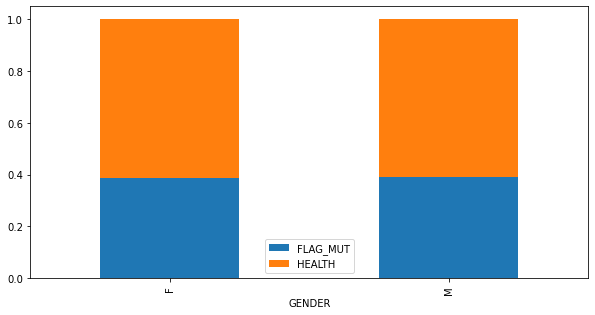

In [16]:
df.groupby('GENDER').agg('mean')[['FLAG_MUT','HEALTH']].plot(kind = 'bar', figsize = (10, 5), stacked = True)
#не влияет на результат, поэтому удалим

<AxesSubplot:xlabel='IS_CAUCAS'>

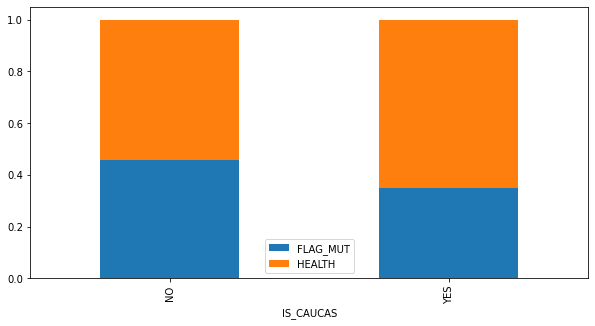

In [17]:
df.groupby('IS_CAUCAS').agg('mean')[['FLAG_MUT','HEALTH']].plot(kind = 'bar', figsize = (10, 5), stacked = True)
#этнические признаки имеют значения

<AxesSubplot:xlabel='HAS_APPENDIX'>

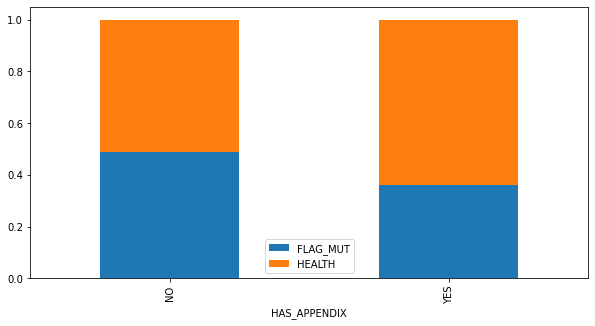

In [18]:
df.groupby('HAS_APPENDIX').agg('mean')[['FLAG_MUT','HEALTH']].plot(kind = 'bar', figsize = (10, 5), stacked = True)
#больше зараженных тех, у кого нет апецендицита 

<AxesSubplot:xlabel='HAS_ALLERGY'>

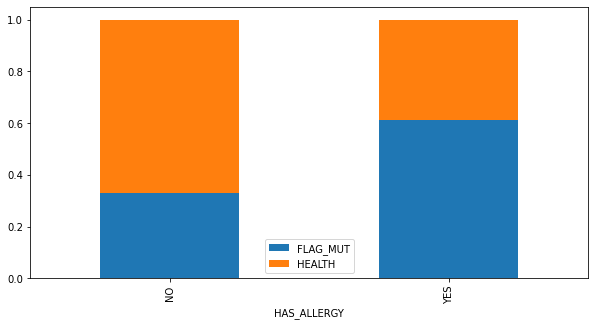

In [19]:
df.groupby('HAS_ALLERGY').agg('mean')[['FLAG_MUT','HEALTH']].plot(kind = 'bar', figsize = (10, 5), stacked = True)
#влияние есть

In [20]:
df['IS_CAUCAS'] = df['IS_CAUCAS'].map({'NO':0, 'YES':1})
df['HAS_APPENDIX'] = df['HAS_APPENDIX'].map({'NO':0, 'YES':1})
df['HAS_ALLERGY'] = df['HAS_ALLERGY'].map({'NO':0, 'YES':1})


In [21]:
df.head()

,ID_SIMPERS,FLAG_MUT,AGE,DOSE,HEIGHT,WEIGHT,GENDER,IS_CAUCAS,HAS_APPENDIX,HAS_ALLERGY,HEALTH
0,10002748,1.0,17.0,19.0,164.0,120.0,M,0,0,0,0.0
1,10003438,0.0,62.0,17.0,169.0,137.0,M,1,1,0,1.0
2,10004371,1.0,5.0,24.0,100.0,21.0,M,1,0,0,0.0
3,10002836,1.0,13.0,29.0,154.0,48.0,F,0,0,0,0.0
4,10000347,0.0,35.0,28.0,198.0,121.0,M,1,1,1,1.0


In [52]:
X = df[['AGE','DOSE','HEIGHT','WEIGHT','IS_CAUCAS','HAS_APPENDIX','HAS_ALLERGY']]
y = df ['FLAG_MUT']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [56]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
y_pred = tree.predict(X_test)
y_pred

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [58]:
acc = accuracy_score(y_test, y_pred)
acc

0.6645569620253164

In [59]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[433, 157],
       [161, 197]], dtype=int64)

Text(33.0, 0.5, 'Actual')

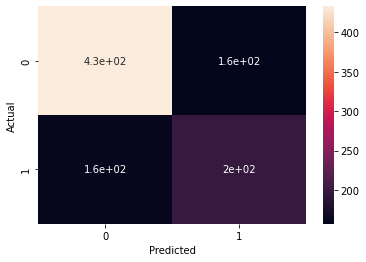

In [60]:
sns.heatmap (cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

<BarContainer object of 7 artists>

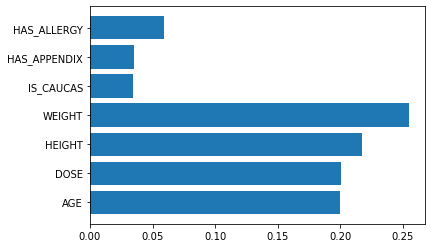

In [62]:
plt.barh(X_train.columns, tree.feature_importances_)

In [85]:
res = []
for size in range (1,50):
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = size/100,
    random_state = 0,
    stratify = y
    )
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    res.append(acc)

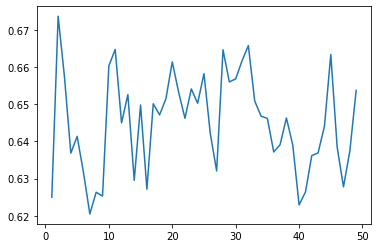

In [86]:
plt.plot(range(1, 50), res)